In [1]:
!pip install -r requirements.txt
from mindee import Client
import json
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math
from IPython.lib.pretty import pretty

In [2]:
mindee_client = Client(
    expense_receipt_token= '<api key>',

    raise_on_error=True
)
#get a free api key at platform.mindee.com

Image size: (2731, 2048)


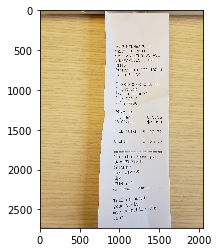

In [3]:
#load image - get height and width - show image
imagepath = 'images/gas.jpeg'
image = cv2.imread(imagepath)
#fix colour space
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
height, width, channels = image.shape
print(f"Image size: ({height}, {width})")
plt.imshow(image)
plt.show()

In [4]:
parsed_data = mindee_client.parse_receipt(imagepath)

In [5]:
print(parsed_data.receipt)

-----Receipt data-----
Filename: gas.jpeg
Total amount: 25.72 
Date: 2018-10-12
Category: gasoline
Time: 11:39
Merchant name: BSAW MINNEAPOLIS
Taxes: 
Total taxes: None
----------------------


In [6]:
print(parsed_data.http_response)

{'api_request': {'error': {}, 'resources': ['document'], 'status': 'success', 'status_code': 201, 'url': 'http://api.mindee.net/v1/products/mindee/expense_receipts/v3/predict'}, 'document': {'annotations': {'labels': {}}, 'id': '6b3430e9-3cd9-4fa9-aacf-1bf7ff30af6f', 'inference': {'extras': {}, 'finished_at': '2022-01-11T23:28:13+00:00', 'pages': [{'id': 0, 'prediction': {'category': {'confidence': 0.99, 'value': 'gasoline'}, 'date': {'confidence': 0.93, 'polygon': [[0.462, 0.265], [0.6, 0.265], [0.6, 0.287], [0.462, 0.287]], 'raw': '10-12-2018', 'value': '2018-10-12'}, 'locale': {'confidence': 0.83, 'country': 'US', 'currency': 'USD', 'language': 'en', 'value': 'en-US'}, 'orientation': {'confidence': 0.99, 'degrees': 0}, 'supplier': {'confidence': 0.58, 'polygon': [[0.455, 0.158], [0.688, 0.158], [0.688, 0.177], [0.455, 0.177]], 'value': 'BSAW MINNEAPOLIS'}, 'taxes': [], 'time': {'confidence': 0.99, 'polygon': [[0.462, 0.287], [0.614, 0.287], [0.614, 0.309], [0.462, 0.309]], 'raw': '1

In [7]:
print(parsed_data.receipt.total_incl.bbox)

[[0.668, 0.595], [0.746, 0.595], [0.746, 0.613], [0.668, 0.613]]


In [8]:
print("total with tax", parsed_data.receipt.total_incl.value)
print("total without tax", parsed_data.receipt.total_excl.value)
print("total tax", parsed_data.receipt.total_tax.value)

total with tax 25.72
total without tax None
total tax None


In [9]:
# To get the list of taxes
taxes = parsed_data.receipt.taxes

# Loop on each Tax field
for tax in taxes:
   # To get the tax amount
   tax_amount = tax.value
   
   # To get the tax code for from a tax object
   tax_code = tax.code
  
   # To get the tax rate
   tax_rate = tax.rate
   print((" tax amount: {tax_amount} \n tax_code: {tax_code} \n tax_rate: {tax_rate} ").format(tax_amount=tax_amount, tax_code=tax_code, tax_rate=tax_rate ))

In [10]:
print("Date on receipt: ", parsed_data.receipt.date.value)

Date on receipt:  2018-10-12


In [11]:
print("merchant name:" , parsed_data.receipt.merchant_name.value)

merchant name: BSAW MINNEAPOLIS


In [12]:
print("location (country): ", parsed_data.receipt.locale.value)
print("currency: ", parsed_data.receipt.locale.currency)

location (country):  en-US
currency:  USD


In [13]:
print("purchase category: ", parsed_data.receipt.category.value)

purchase category:  gasoline


In [14]:
print("time of purchase: ", parsed_data.receipt.time.value)

time of purchase:  11:39
